In [76]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
## Loading the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [5]:
## Outcome is the label here
y = data['Outcome']
X = data.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=12)
x_train.shape

(614, 8)

In [21]:
## creating a xgboost model with all default paramters
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train,y_train)
score = xgboost_model.score(X,y)
print(f"training score {score}")
y_pred = xgboost_model.predict(x_test)
test_score = accuracy_score(y_test,y_pred)
print(f"testing score {test_score}")

[19:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score 0.9479166666666666
testing score 0.7402597402597403


In [22]:
xgboost_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [23]:
## Let's create a model with some hyperparameters
xgboost_model = XGBClassifier(eta=0.10)
xgboost_model.fit(x_train,y_train)
score = xgboost_model.score(X,y)
print(f"training score {score}")
y_pred = xgboost_model.predict(x_test)
test_score = accuracy_score(y_test,y_pred)
print(f"testing score {test_score}")

[19:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score 0.9505208333333334
testing score 0.7727272727272727


## We saw above that using eta=0.10 which is the learning rate there is some increase in the accuracy, let'e try some other hyperparamter tuning as well.

In [50]:
xgboost_model = XGBClassifier(eta=0.10, alpha=1, max_depth=10, n_estimators=63)
xgboost_model.fit(x_train,y_train)
score = xgboost_model.score(X,y)
print(f"training score {score}")
y_pred = xgboost_model.predict(x_test)
test_score = accuracy_score(y_test,y_pred)
print(f"testing score {test_score}")

[21:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score 0.9544270833333334
testing score 0.8246753246753247


### Let's run various models and try

In [80]:
models = []
models.append(('Logistic regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('XGBoost', XGBClassifier(eta=0.10, alpha=1, max_depth=10, n_estimators=63)))



import time

## for evaluating models
results = {}
scoring = 'accuracy'

for name, model in models:
    start_time = time.time()
    model.fit(x_train,y_train)
    
    
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    results[name]=accuracy
    
    print(f"Accuracy of the {name} is :{accuracy * 100} %")

results


Accuracy of the Logistic regression is :81.16883116883116 %
Accuracy of the KNN is :68.18181818181817 %
Accuracy of the SVM is :77.27272727272727 %
[21:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the XGBoost is :82.46753246753246 %


{'Logistic regression': 0.8116883116883117,
 'KNN': 0.6818181818181818,
 'SVM': 0.7727272727272727,
 'XGBoost': 0.8246753246753247}

### Let's visualize the accuracy of different models

Text(0, 0.5, 'Accuracy')

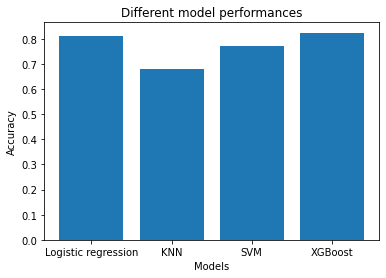

In [89]:
plt.bar(*zip(*results.items()))
plt.title("Different model performances")
plt.xlabel('Models')
plt.ylabel('Accuracy')

AttributeError: 'Rectangle' object has no property 'xlabel'

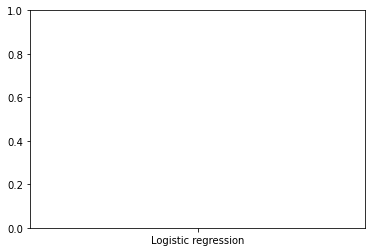

In [91]:
plt.bar(*zip(*results.items()), xlabel="Models", ylabel="Accuracy")
plt.title("Different model performances")
plt.show()

In [92]:
x=['a','b','c']
y=[1,2,3]

for i,j in zip(x,y):
    print(i,j)

a 1
b 2
c 3
